<center>

# `Multiclass Logistic Regression`

<img src="../assets/0_to_9.png" alt="Texto alternativo" height="250" width="1500">

</center>


## `What version of scikit-learn do we have?`

In [176]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


## `Import libraries`

In [177]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

## `Load data`

In [178]:
from sklearn.datasets import load_digits
data, target = load_digits(n_class=10, return_X_y=True, as_frame=True)

## `About data`

- `Number of Instances` : 1797
- `Number of Attributes`: 64
- `Attribute Information` : 8x8 image of integer pixels in the range 0 to 16.
- `Missing Attribute Values`: None

In [179]:
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [180]:
target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

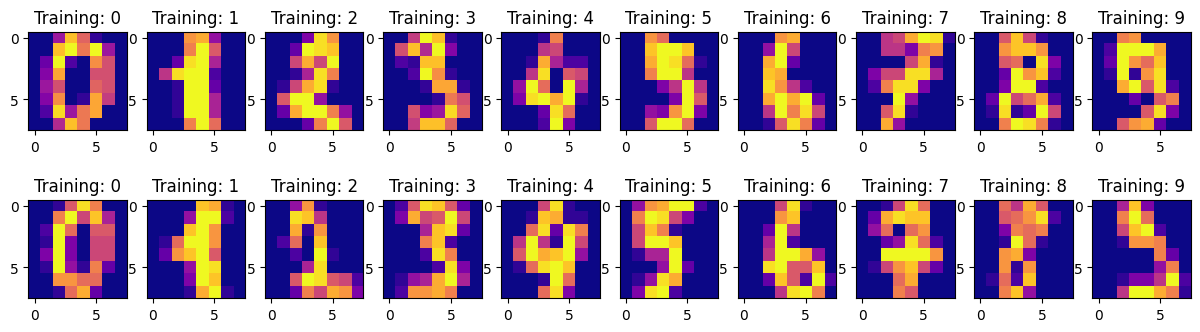

In [181]:
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(np.reshape(data.loc[i * 10 + j], (8, 8)), cmap='plasma')
        axes[i,j].set_title(f"Training: {target.loc[i * 10 + j]}")

### `Data is balanced`

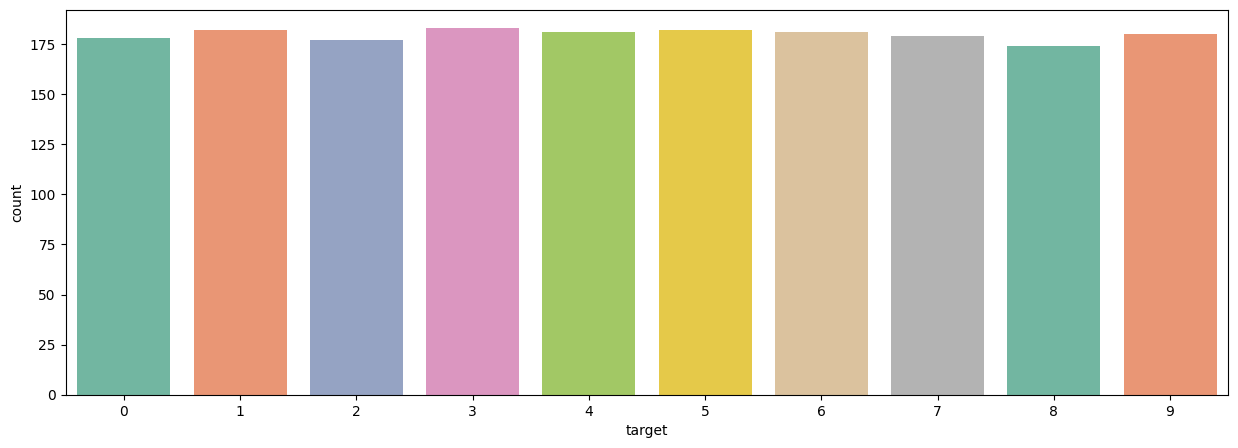

In [182]:
plt.figure(figsize=(15,5))
sns.countplot(x=target, palette='Set2', hue=target, legend=False)
plt.show()

## Split de datos en train y test

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=0)

## Train Model

In [188]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

## Evaluación del modelo

In [189]:
predictions = logistic_reg.predict(x_test)

In [190]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(0.5, 137.22222222222217, 'Predicted label')

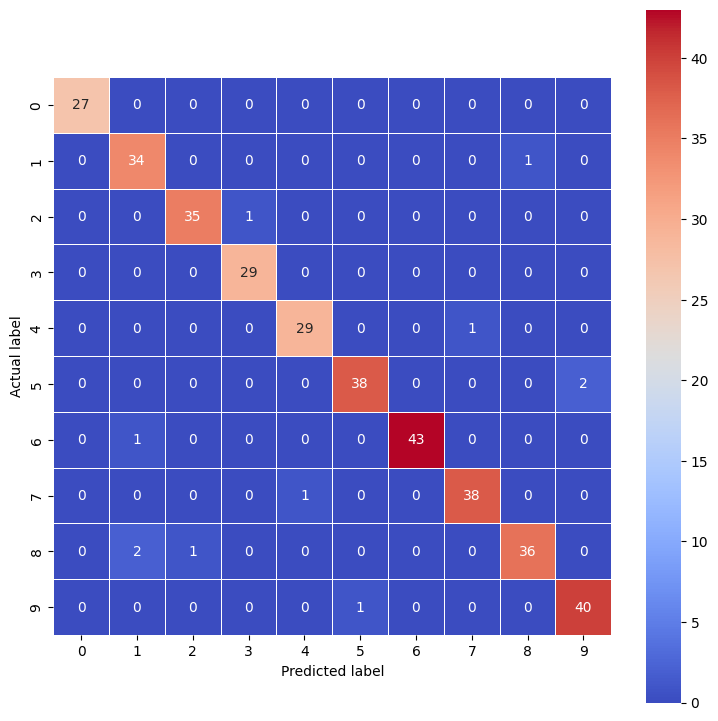

In [191]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')